In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')
#combine=[train, test]

## <center>Exploratory data analysis

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
#train.Fare.unique()

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#train.isnull().sum()

### Number of surviving/non-surviving passengers

In [7]:
print(train['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

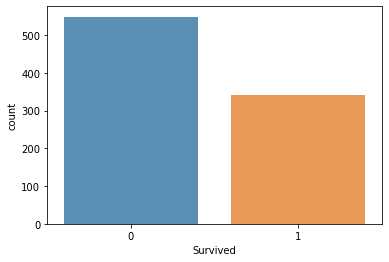

In [8]:
sns.countplot(x='Survived', data=train, alpha=0.8)

### Proportion of surviving 1st class passengers with regards to the total number of 1st class passengers

In [9]:
fclass_sur = train[(train['Survived']==1)&(train['Pclass']==1)]
total_fclass = train[(train['Pclass']==1)]
fclas_sur_prop = (len(fclass_sur) / len(total_fclass)) * 100
print('proportion of survinving firstclass passengers:', round(fclas_sur_prop, 3))

proportion of survinving firstclass passengers: 62.963


###  Male/female passengers count per class (1st/2nd/3rd class)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

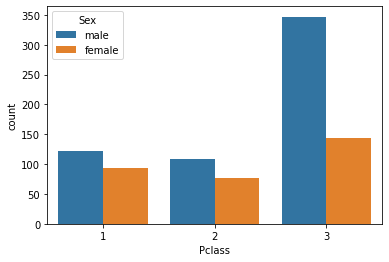

In [10]:
sns.countplot(x='Pclass', hue='Sex', data=train)

### Age distribution of surviving/non-surviving passengers

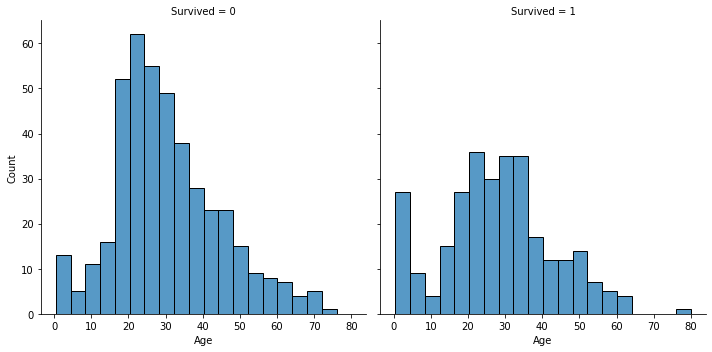

In [11]:
sns.displot(x='Age', col='Survived', data=train, multiple='dodge')

### Average age for survived and drowned passengers

In [12]:
survived = train[train['Survived']==1]
drowned = train[train['Survived']==0]
print('Mean age of survived:', survived.Age.mean(),'\n''Mean age of drowned:', drowned.Age.mean())

Mean age of survived: 28.343689655172415 
Mean age of drowned: 30.62617924528302


### Replace missing age values by the mean age.

In [13]:
train_copy = train.copy()
train_copy.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train_copy.Age.fillna(train_copy.Age.mean(), inplace=True)
train_copy.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class

In [15]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64